<font size=6> Machine Learning: Aprendizaje No Supervisado </font>

**Importamos librerias**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

#ignorar warning para que quede mejor el notebook
import warnings
warnings.filterwarnings('ignore')

##Pre-procesamiento del dato##

**Importamos el dataset**

In [6]:
cv = pd.read_csv('Datos/costo_de_vida_2018.csv')
cv.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,63.649222,27.173148,46.057667,59.634389,59.041463,90.159444
std,21.335843,17.176557,18.299283,22.158924,26.213776,36.579038
min,20.860000,3.820000,13.260000,19.260000,12.060000,1.880000
25%,46.080000,13.007500,31.072500,40.632500,34.590000,58.322500
50%,67.855000,25.095000,48.110000,61.630000,64.095000,95.160000
75%,78.462500,35.337500,57.975000,74.415000,77.215000,119.960000
max,145.430000,115.360000,128.760000,149.860000,158.750000,168.930000


Este dataset lista los indices de costo de vida, de alquiler, de costo de vida más alquiler, de comestibles, de precios de restaurantes y de poder adquisitivo local de diferentes ciudades del mundo.

**Análisis de variables**

In [ ]:
cv.shape

(540, 7)

In [ ]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            540 non-null    object 
 1   Cost of Living Index            540 non-null    float64
 2   Rent Index                      540 non-null    float64
 3   Cost of Living Plus Rent Index  540 non-null    float64
 4   Groceries Index                 540 non-null    float64
 5   Restaurant Price Index          540 non-null    float64
 6   Local Purchasing Power Index    540 non-null    float64
dtypes: float64(6), object(1)
memory usage: 29.7+ KB


In [ ]:
cv.isna().sum()

City                              0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

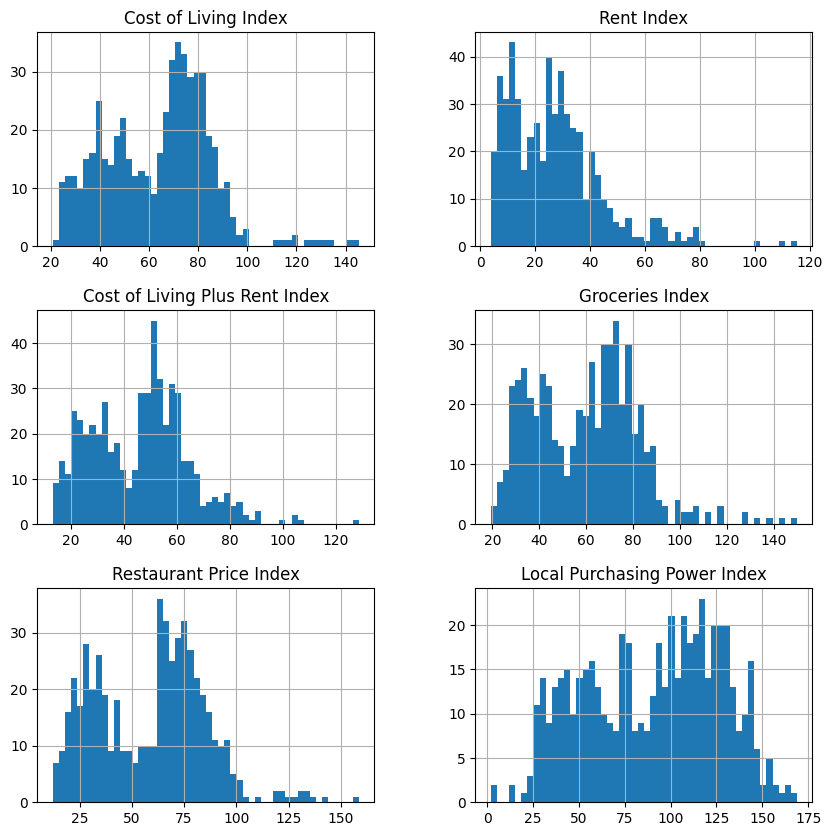

In [ ]:
cv.hist(bins=50, figsize=(10,10));
plt.show()

En general, podemos observar que los diferentes índices poresentan una distibución bi-modal. Además, cuanto más alto el índice, menor es la cantidad de muestras, salvo para el índice de "Local Purchasing Power Index"

<Axes: >

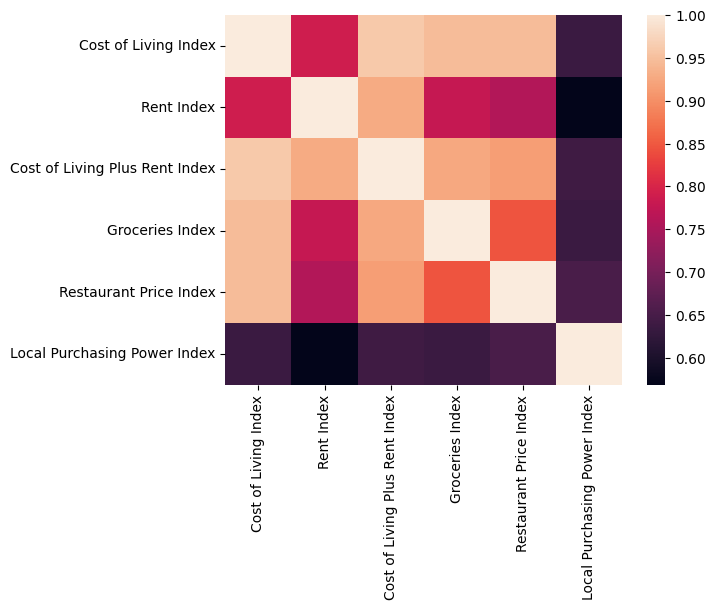

In [ ]:
corr=cv.corr()
sns.heatmap(corr)

Vemos que las columnas que tienen valores de correlación intermedios a altos, lo cual puede ser una dificultad para el método de kmeans.



##Implementación de K-means##


**Escalado los datos**

<font color='red'>Copio en otro DF solo las columnas **'Cost of Living Index'** y **'Local Purchasing Power Index'** para poder escarlar los datos.</font>

In [ ]:
datos = cv[['Cost of Living Index', 'Local Purchasing Power Index']].copy()

In [ ]:
# Crear un objeto Scaler
scaler = StandardScaler()

# Ajustar el objeto Scaler a los datos
scaler.fit(datos)

# Transformar los datos usando el Scaler
datos_estandarizados = scaler.transform(datos)

# Convertimos a DF el resultado.
datos_estandarizados = pd.DataFrame(data = datos_estandarizados, columns = datos.columns)

Visualizamos los datos

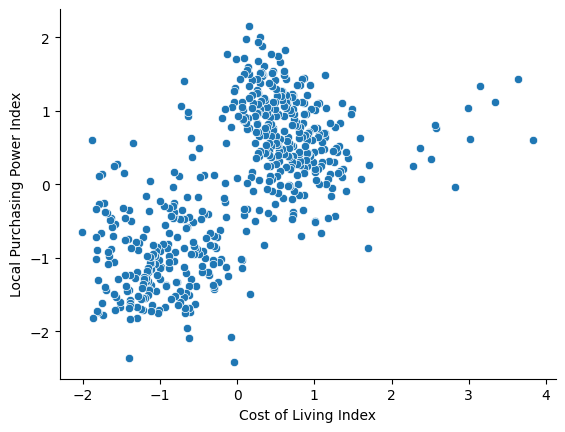

In [ ]:
sns.scatterplot(x="Cost of Living Index", y="Local Purchasing Power Index",
                data=datos_estandarizados, palette='rocket_r')
sns.despine()
plt.show()

# K-MEANS

In [ ]:
X= datos_estandarizados.values

## *Utilizamos **"El método del codo"** para luego seleccionar el número de clusters óptimo.* ##

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

Graficamos la suma de los cuadrados de las distancias en función del número de clusters

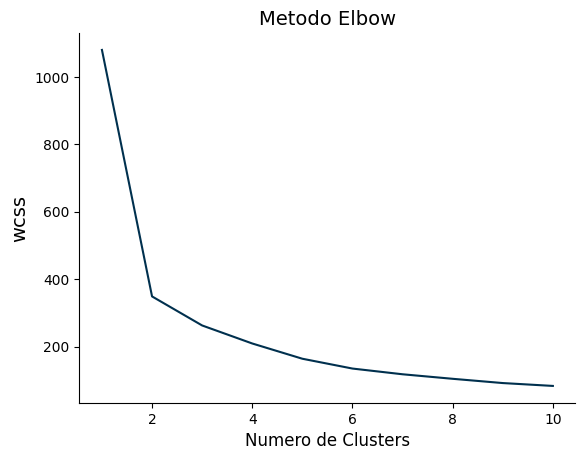

In [ ]:
plt.plot(range(1, 11), wcss, c="#00304E")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

Para elegir el valor de k vemos dónde se estabiliza la curva, en este caso vamos a considerar los valores k=2 y k=3.

Probamos con **2** clusters.

In [ ]:
# Especificamos el numero adecuado de clusters
kmeansmodel = KMeans(n_clusters= 2, init = 'k-means++', random_state=0)

In [ ]:
#Entrenamos los modelos con los datos sin pasarles las etiquetas
y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
etiquetas_kmeans = kmeansmodel.labels_

Consultamos el lugar de los centroides y la cantidad de puntos asignados a cada cluster.

In [ ]:
centros = kmeansmodel.cluster_centers_

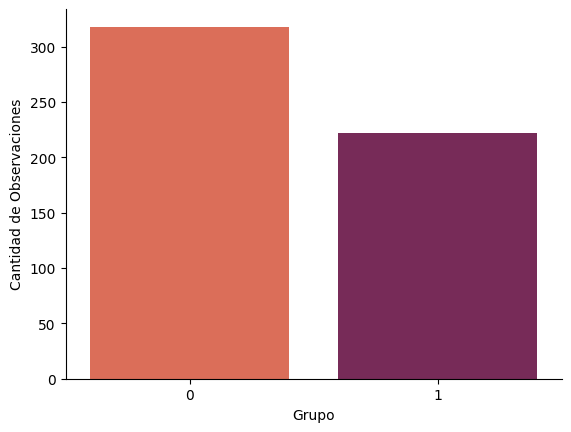

In [ ]:
sns.countplot(x= y_kmeans, palette='rocket_r')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

Visualizamos los clusters

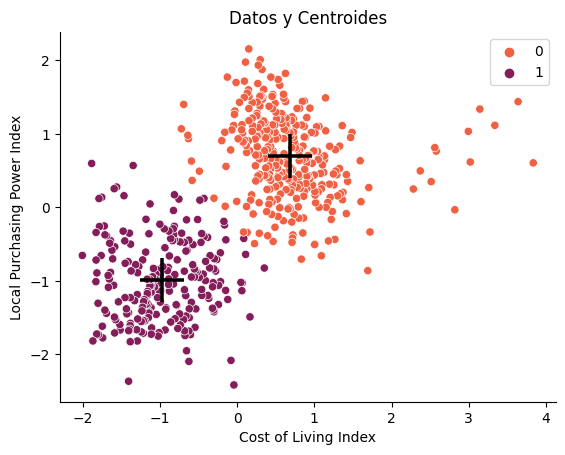

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, -1], hue = etiquetas_kmeans, palette='rocket_r')
sns.scatterplot(x=centros[:, 0], y=centros[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
plt.xlabel("Cost of Living Index")
plt.ylabel("Local Purchasing Power Index")
sns.despine()
plt.show()

In [ ]:
# Calcula la SSD
SSD = kmeansmodel.inertia_
print("SSD: ", SSD)

SSD:  348.6556851914313


Este resultado nos sugiere que los clusters obtenidos por el algoritmo K-means son muy diferentes entre sí, lo que sugiere que los clusters podrían no ser coherentes o estar mal definidos.
Este valor nos indica que los puntos de datos dentro de los clusters están más dispersos y lejos de sus centroides.


Probamos con 3 clusters.


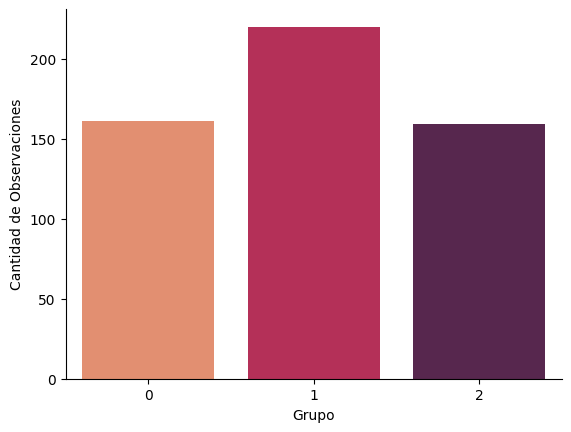

In [ ]:
# Especificamos el numero adecuado de clusters
kmeansmodel = KMeans(n_clusters= 3, init = 'k-means++', random_state=0)
#Entrenamos los modelos con los datos sin pasarles las etiquetas
y_kmeans= kmeansmodel.fit_predict(X)
etiquetas_kmeans = kmeansmodel.labels_
centros = kmeansmodel.cluster_centers_
sns.countplot(x= y_kmeans, palette='rocket_r')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

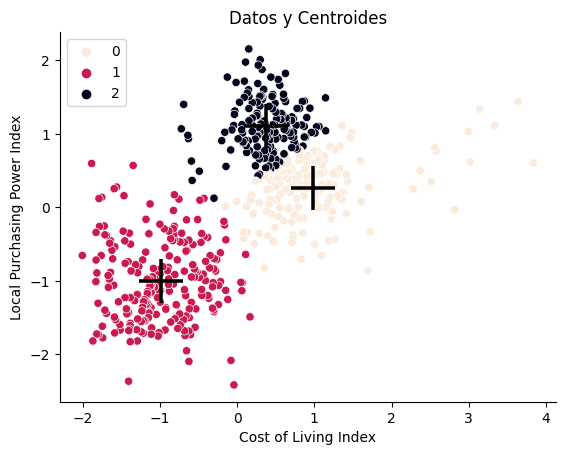

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, -1], hue = etiquetas_kmeans, palette='rocket_r')
sns.scatterplot(x=centros[:, 0], y=centros[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
plt.xlabel("Cost of Living Index")
plt.ylabel("Local Purchasing Power Index")
sns.despine()
plt.show()

In [ ]:
# Calcula la SSD
SSD = kmeansmodel.inertia_
print("SSD: ", SSD)

SSD:  262.48618186459


Este caso posee clusters más compactos y homogéneos comparado con k=2. Aún así se nota que la distribución de los datos está desbalanceada.


## *Ahora utilizamos el **Método Silhouette** para determinar el mejor número de clusters* ##

In [ ]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

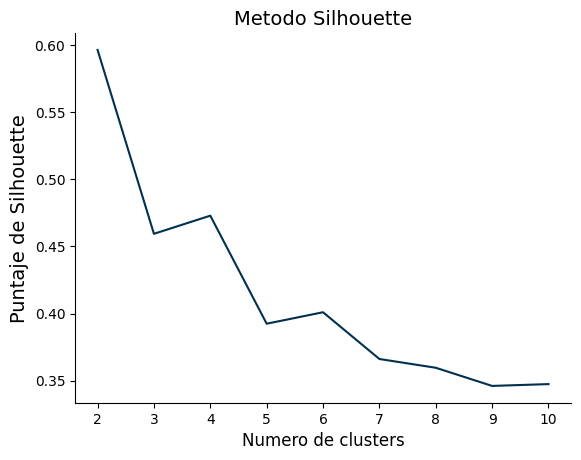

In [ ]:
plt.plot(range(2,11),sil, c="#00304E")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

Vemos que el número de clusters que brinda un mayor valor de silhoutte_score es k=**2**

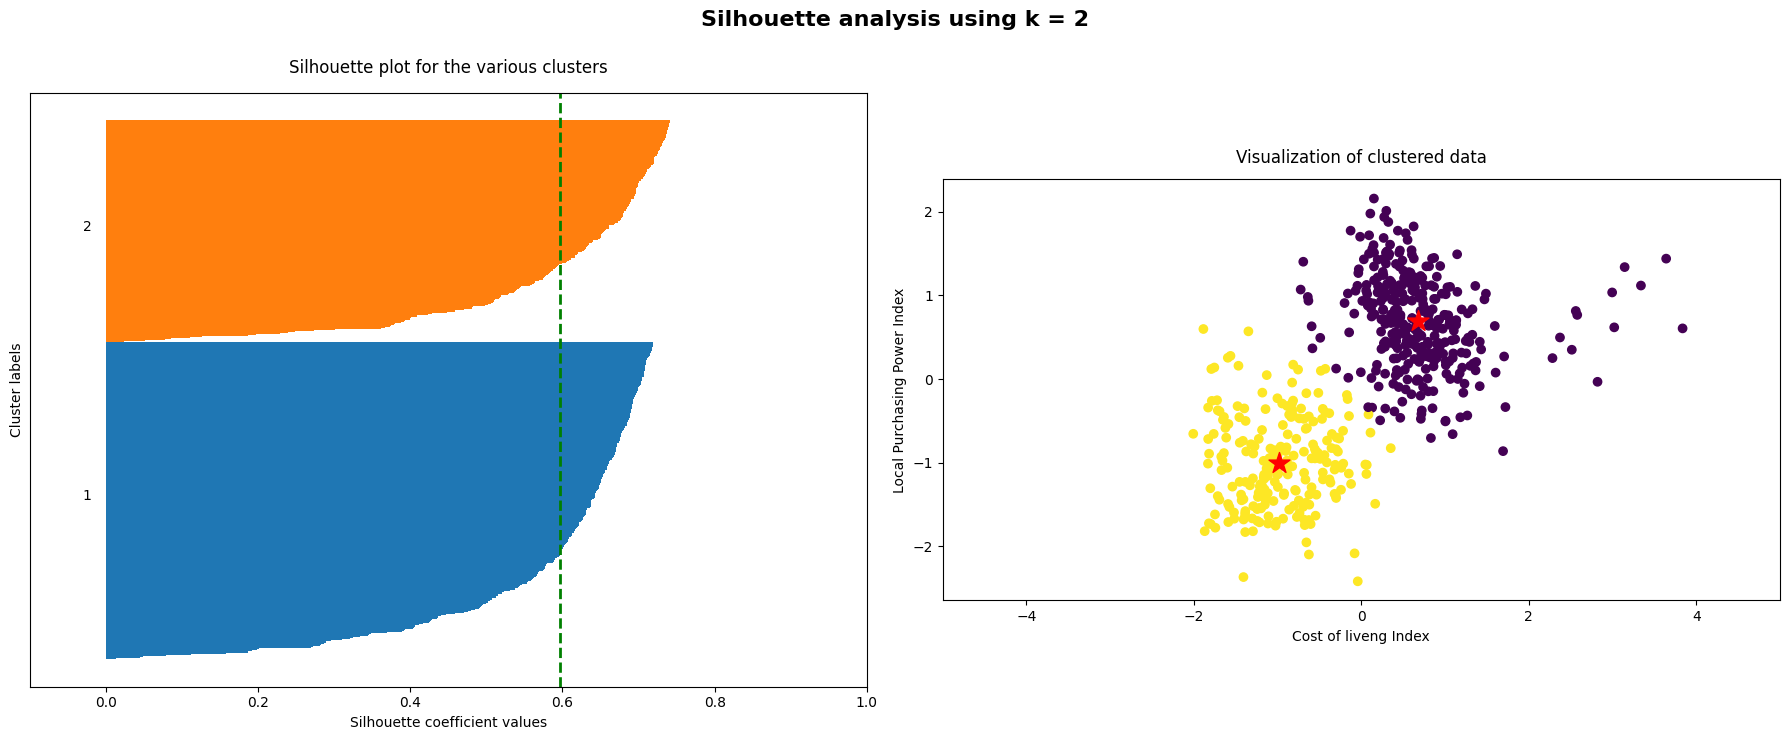

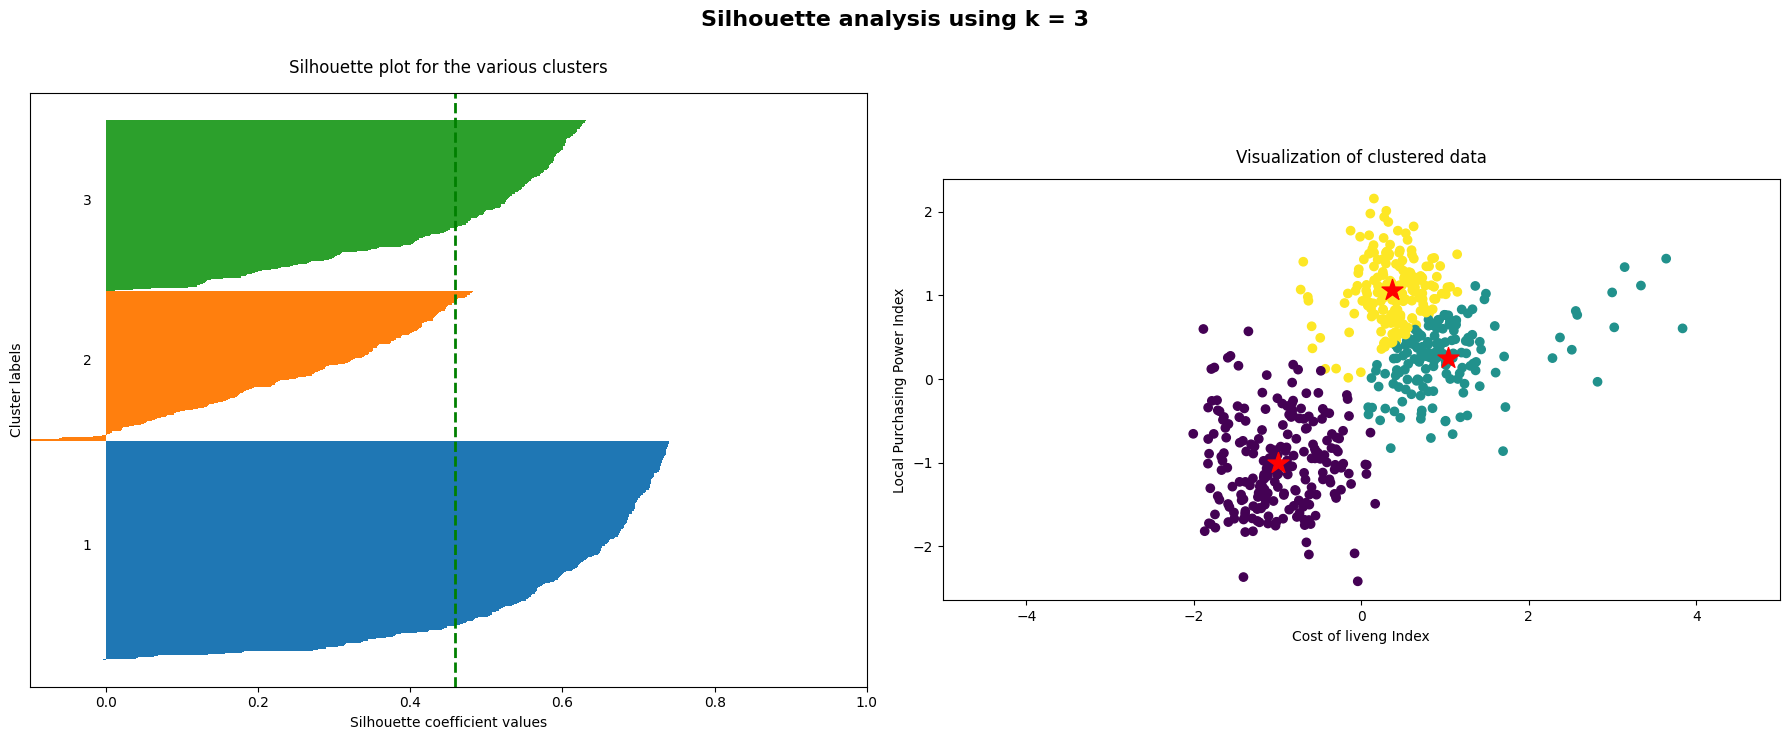

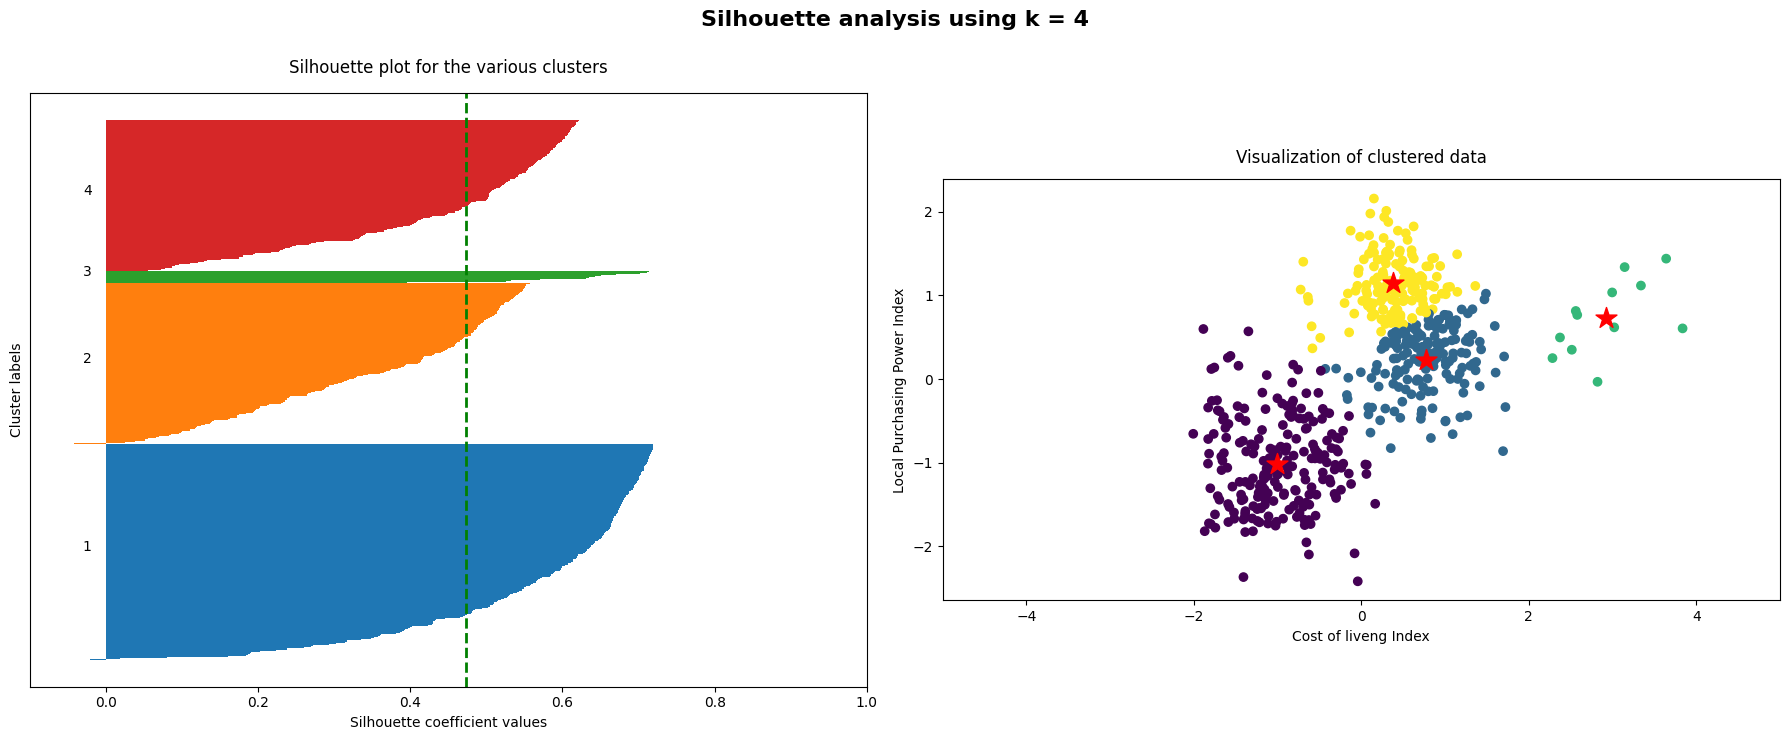

In [ ]:
X_std = X
lista_k = [2, 3, 4]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-5, 5])
    ax2.set_xlim([-5, 5])
    ax2.set_xlabel('Cost of liveng Index')
    ax2.set_ylabel('Local Purchasing Power Index')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

# DBSCAN

Vemos ahora como se comporta metodo de DBSCAN para poder identificar los clusters.

Recordemos que min_samples es la cantidad mínima de puntos que se requiere para formar un cluster. Y eps o epsilon es la máxima distancia entre dos puntos que pueden estar dentro del mismo cluster.

En general: cuan más grande es el data set, mayor es min_samples. Si el dato es ruidoso también será mayor. En este caso como el dato tiene dos dimensiones lo ideal es utilizar una cantidad mínima de 4.


In [ ]:
best_eps = None
best_min_samples = None
best_silhouette_score = -1
eps_values = np.arange(0.2, 2.0, 0.1)
min_samples_values = range(4, 21)  ##Tomamos una cantidad min_samples de 4 hasta 20  por cluster para ver el velor óptimo.

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        unique_labels = np.unique(labels)

        if len(unique_labels) > 1: #Pedimos que haya más de una etiqueta, porque si no, silhouette_score no se puede calcular.
            silhouette = silhouette_score(X, labels)
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

print("Mejor valor de epsilon:", best_eps)
print("Mejor valor de min_samples:", best_min_samples)
print("Mejor puntuación de silueta:", best_silhouette_score)

##AGREGAR GRAFICO DE SILHOUETTE PARA best_eps y min_samples.

Mejor valor de epsilon: 0.4000000000000001
Mejor valor de min_samples: 19
Mejor puntuación de silueta: 0.5495088197246225


Graficamos las curvas de silhoutte para el mejor valor de epsilon y para el mejor valor de min_samples respectivamente.

In [ ]:
sil = []

for min_samples in range(4,21):
    dbscan = DBSCAN(eps=0.4, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    sil.append(silhouette_score(X, labels, metric='euclidean'))

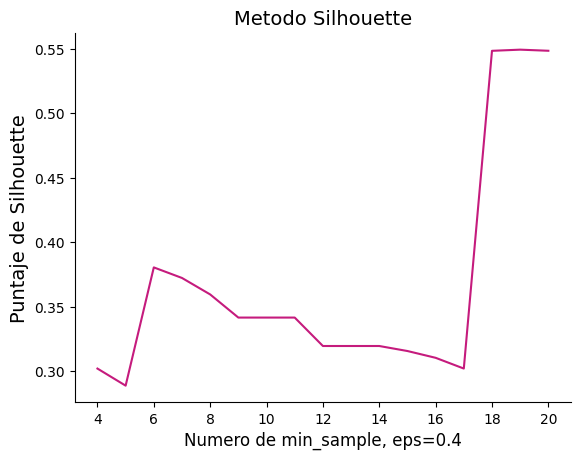

In [ ]:
plt.plot(range(4,21),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de min_sample, eps=0.4', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [ ]:
sil = []

##Para min_samples=19 valores de eps mayores a 1.3 dan una sola etiqueta.

for eps in np.arange(0.3,1.3,0.1):
    dbscan = DBSCAN(eps=eps, min_samples=19)
    labels = dbscan.fit_predict(X)
    sil.append(silhouette_score(X, labels, metric='euclidean'))

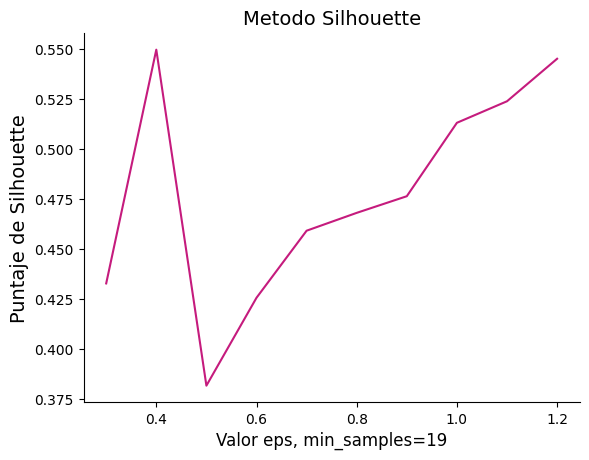

In [ ]:
plt.plot(np.arange(0.3,1.3,0.1),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Valor eps, min_samples=19', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

Aunque pareciera que hay un valor de eps más óptimo para min_samples=19, no es así. Valores mayores nos brindan que hay un solo cluster, pero por la distribución que vemos en el gráfico "Cost of Living Index" vs. "Local Purchasing Power Index" hay al menos dos clusters.

Utilizamos el mejor valor de epsilon y de min_samples para utilizar el método de DBSCAN

In [ ]:
dbscanmodel = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscanmodel.fit(X)

DBSCAN(eps=0.4000000000000001, min_samples=19)

Definimos la función para graficar el resultado de los modelos.

In [ ]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Numero estimado de clusters: %d' % n_clusters_1)
    plt.xlabel("Cost of Living Index")
    plt.ylabel("Local Purchasing Power Index")
    plt.show()

Vemos como le fue a DBSCAN

In [ ]:
# Consultamos las etiquetas
etiquetas_dbscan = dbscanmodel.labels_

# Número de clusters en etiquetas, ignorando el ruido si está presente
n_clusters = len(set(etiquetas_dbscan)) - (1 if -1 in etiquetas_dbscan else 0)
n_noise = list(etiquetas_dbscan).count(-1)

In [ ]:
print('Numero estimado de clusters: %d' % n_clusters)
print('Numero estimado de puntos outliers: %d' % n_noise)

Numero estimado de clusters: 2
Numero estimado de puntos outliers: 32


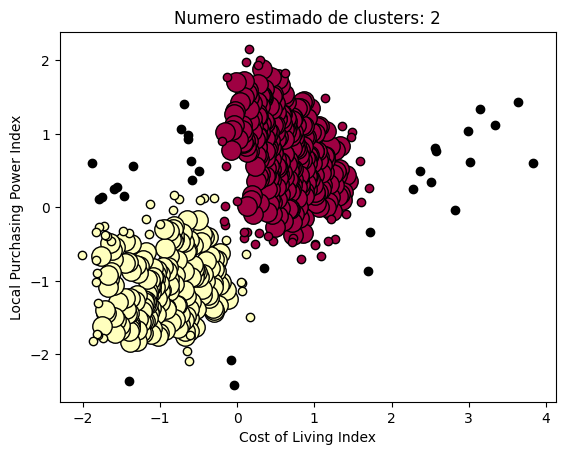

In [ ]:
plot_DBSCAN(X, etiquetas_dbscan, dbscanmodel, n_clusters)

# Conclusiones

Tanto K-Means como DBSCAN, con los parámetros óptimos de epsilon y min_samples,  sugieren que el número óptimo de clusters es 2.
La calidad de la agrupación se mide mediante el método de silhoutte para ambos métodos, y el método del codo para k-means.

El algoritmo K-Means tiene una puntuación de silueta de 0.5962 y el algoritmo DBSCAN, con eps=0.4 y min_samples=19 tiene una puntuación de silueta de 0.5495 . Son casi iguales, pero DBSCAN performa mejor, ya que si comparamos con el resultados de K-Means, aunque parezca que los resultados no son los esperados, desde nustra perspectiva los datos ubicados en el sector derecho considerados como outliers realmente lo son, por lo que nos parece adecuado este resultado.
